In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pydicom
from pydicom.data import get_testdata_files #I need to install this library because my images from medicine technology
import os
import glob
import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
adni = pd.read_csv("../data/MCI_AD_CN_Final.csv", sep=",")
adni.head()

,Subject ID,Phase,Sex,Weight,Research Group,APOE A2,Visit,Study Date,Age,MMSE Total Score,GDSCALE Total Score,Global CDR,Description,Type,Imaging Protocol,Structure
0,002_S_0729,ADNI 2,F,75.3,MCI,4,ADNI2 Year 2 Visit,8/16/2013,72.3,24.0,1.0,1.0,3 Plane Localizer,Original,Acquisition Plane=AXIAL;Weighting=T1,Brain
1,002_S_1070,ADNI 1,M,88.4,MCI,3,ADNI1/GO Month 24,12/11/2008,75.8,19.0,1.0,1.0,3-plane localizer,Original,Acquisition Plane=AXIAL;Weighting=T1,Brain
2,002_S_1070,ADNI 1,M,88.4,MCI,3,ADNI1/GO Month 24,12/11/2008,75.8,19.0,1.0,1.0,SURVEY,Original,Acquisition Plane=AXIAL;Weighting=T1,Brain
3,003_S_4892,ADNI 2,F,81.6,AD,4,ADNI2 Year 1 Visit,9/19/2013,76.3,26.0,4.0,1.0,Calibration Scan,Original,Acquisition Plane=AXIAL;Weighting=T1,Brain
4,003_S_4892,ADNI 2,F,81.6,AD,4,ADNI2 Year 1 Visit,9/19/2013,76.3,26.0,4.0,1.0,3 Plane Localizer,Original,Acquisition Plane=AXIAL;Weighting=T1,Brain


#### We needs to know which is the path per each image

In [46]:
path = "../data/ADNI_4/ADNI_4/**/**/**/**/**.dcm"
for paths in glob.glob(path):
    print(paths.split('/'))
    break

#### It's split our local path in different columns to get only filename of image

In [4]:
def makeImagDf(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('paciente', []).append(paths.split('/')[-5])
        dictionary.setdefault('prueba', []).append(paths.split('/')[-4])
        dictionary.setdefault('dcm', []).append(paths.split('/')[-1])
        dictionary.setdefault('path', []).append(paths)        
    images = pd.DataFrame(dictionary)
    return images

In [5]:
makeImagDf(path)

,paciente,prueba,dcm,path
0,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
1,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
3,023_S_4501,localizer,ADNI_023_S_4501_MR_localizer__br_raw_201405091...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
4,027_S_1254,3-plane_localizer,ADNI_027_S_1254_MR_3-plane_localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
...,...,...,...,...
2662,005_S_1341,3-pl_T2__FGRE,ADNI_005_S_1341_MR_3-pl_T2__FGRE__br_raw_20080...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2663,135_S_5015,localizer,ADNI_135_S_5015_MR_localizer__br_raw_201311251...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/1...
2664,099_S_0054,localizer_VIT_E_R_TEMPLE_,ADNI_099_S_0054_MR_localizer_VIT_E_R_TEMPLE___...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2665,099_S_0054,Localizer_VIT_E_RT_TEMPLE_,ADNI_099_S_0054_MR_Localizer_VIT_E_RT_TEMPLE__...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...


In [6]:
images = pd.DataFrame(makeImagDf(path))
images

,paciente,prueba,dcm,path
0,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
1,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
3,023_S_4501,localizer,ADNI_023_S_4501_MR_localizer__br_raw_201405091...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
4,027_S_1254,3-plane_localizer,ADNI_027_S_1254_MR_3-plane_localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
...,...,...,...,...
2662,005_S_1341,3-pl_T2__FGRE,ADNI_005_S_1341_MR_3-pl_T2__FGRE__br_raw_20080...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2663,135_S_5015,localizer,ADNI_135_S_5015_MR_localizer__br_raw_201311251...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/1...
2664,099_S_0054,localizer_VIT_E_R_TEMPLE_,ADNI_099_S_0054_MR_localizer_VIT_E_R_TEMPLE___...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2665,099_S_0054,Localizer_VIT_E_RT_TEMPLE_,ADNI_099_S_0054_MR_Localizer_VIT_E_RT_TEMPLE__...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...


In [9]:
images

,paciente,prueba,dcm,path
0,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
1,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
3,023_S_4501,localizer,ADNI_023_S_4501_MR_localizer__br_raw_201405091...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
4,027_S_1254,3-plane_localizer,ADNI_027_S_1254_MR_3-plane_localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
...,...,...,...,...
2662,005_S_1341,3-pl_T2__FGRE,ADNI_005_S_1341_MR_3-pl_T2__FGRE__br_raw_20080...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2663,135_S_5015,localizer,ADNI_135_S_5015_MR_localizer__br_raw_201311251...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/1...
2664,099_S_0054,localizer_VIT_E_R_TEMPLE_,ADNI_099_S_0054_MR_localizer_VIT_E_R_TEMPLE___...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2665,099_S_0054,Localizer_VIT_E_RT_TEMPLE_,ADNI_099_S_0054_MR_Localizer_VIT_E_RT_TEMPLE__...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...


In [12]:
pydicom.read_file(images.path[0]).pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [13]:
images["arrays"] = images.path.apply(lambda x: pydicom.read_file(x).pixel_array)

In [20]:
images['arrays'][567][9]

array([ 0,  0,  0,  0,  0, 15, 14, 20, 24, 20, 21, 18, 11, 13, 21, 20, 15,
       14,  8, 12, 16, 14, 14, 11, 13, 21, 19, 15, 12, 16, 12, 18, 17, 24,
       20, 26, 19, 17, 23, 24, 19, 24, 25, 27, 28, 27, 24, 26, 14, 14, 24,
       26, 22, 25, 33, 24, 21, 15, 18, 18, 17, 20, 21, 19, 22, 16, 13, 19,
       25, 21, 16, 18, 12, 22, 39, 26, 15, 22, 27, 14, 17, 22, 20, 14,  9,
       19, 19, 11, 19, 18, 23, 29, 41, 34, 16, 14, 17, 14, 12, 10, 12, 14,
       16, 18, 15, 17, 20, 19, 26, 32, 29, 24, 13, 13, 18, 19, 23, 20, 12,
       10, 14, 31, 24, 18, 27, 26, 26, 18, 17, 23, 22, 19, 17, 17, 13,  9,
        8, 15, 15, 18, 18, 19, 27, 28, 26, 22, 21, 17, 13, 15, 15, 16, 18,
       20, 22, 25, 17, 14, 15, 12, 29, 37, 27, 27, 21, 13, 12, 21, 21, 19,
       20, 17, 18, 25, 19, 17, 11, 16, 18, 16, 22, 25, 18, 12, 16, 18, 15,
       16, 21, 22, 25, 26, 26, 21, 14, 18, 20, 18, 18, 19, 20, 26, 24, 17,
       15, 10,  6, 14, 20, 21, 23, 25, 18, 16, 17, 14, 23, 29, 19, 24, 22,
       15, 15, 16, 16, 11

In [22]:
images["arrays"][0].shape

(256, 256)

In [21]:
images.columns

Index(['paciente', 'prueba', 'dcm', 'path', 'arrays'], dtype='object')

In [42]:
images

,paciente,prueba,dcm,path,arrays
0,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,023_S_4501,localizer,ADNI_023_S_4501_MR_localizer__br_raw_201405091...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,027_S_1254,3-plane_localizer,ADNI_027_S_1254_MR_3-plane_localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
2662,005_S_1341,3-pl_T2__FGRE,ADNI_005_S_1341_MR_3-pl_T2__FGRE__br_raw_20080...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2663,135_S_5015,localizer,ADNI_135_S_5015_MR_localizer__br_raw_201311251...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/1...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2664,099_S_0054,localizer_VIT_E_R_TEMPLE_,ADNI_099_S_0054_MR_localizer_VIT_E_R_TEMPLE___...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 3, 3, 3, 2, 0, 1, 2, 3, 4, 3, 2, 1, 1, 3,..."
2665,099_S_0054,Localizer_VIT_E_RT_TEMPLE_,ADNI_099_S_0054_MR_Localizer_VIT_E_RT_TEMPLE__...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...,"[[0, 2, 2, 3, 3, 2, 2, 1, 1, 1, 2, 2, 1, 3, 5,..."


In [41]:
images.arrays[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

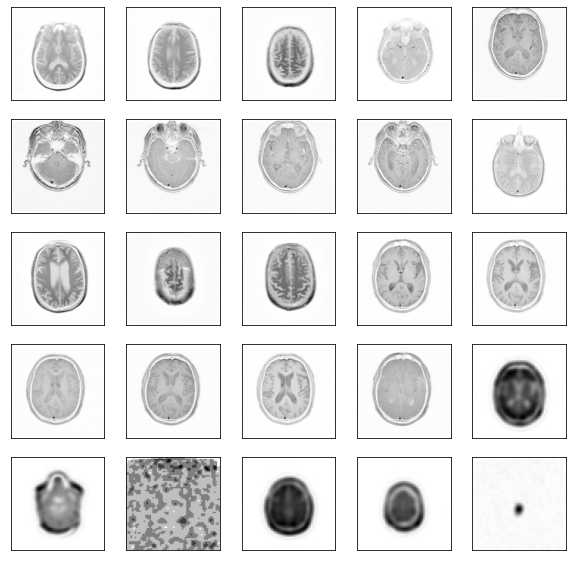

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images.arrays[i], cmap=plt.cm.binary)
plt.show()

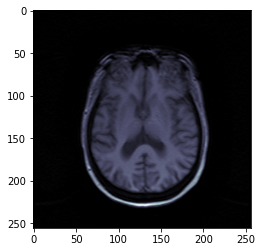

In [24]:
plt.imshow(images.arrays[0], cmap=plt.cm.bone)

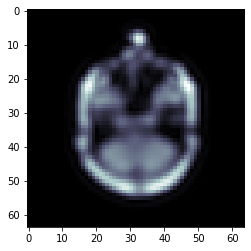

In [30]:
plt.imshow(images.arrays[26], cmap=plt.cm.bone)

In [43]:
images.to_csv("images23.csv")

In [44]:
images_no_arrays = images.drop(columns=['arrays'])
images_no_arrays

,paciente,prueba,dcm,path
0,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
1,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2,019_S_5019,3_Plane_Localizer,ADNI_019_S_5019_MR_3_Plane_Localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
3,023_S_4501,localizer,ADNI_023_S_4501_MR_localizer__br_raw_201405091...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
4,027_S_1254,3-plane_localizer,ADNI_027_S_1254_MR_3-plane_localizer__br_raw_2...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
...,...,...,...,...
2662,005_S_1341,3-pl_T2__FGRE,ADNI_005_S_1341_MR_3-pl_T2__FGRE__br_raw_20080...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2663,135_S_5015,localizer,ADNI_135_S_5015_MR_localizer__br_raw_201311251...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/1...
2664,099_S_0054,localizer_VIT_E_R_TEMPLE_,ADNI_099_S_0054_MR_localizer_VIT_E_R_TEMPLE___...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...
2665,099_S_0054,Localizer_VIT_E_RT_TEMPLE_,ADNI_099_S_0054_MR_Localizer_VIT_E_RT_TEMPLE__...,/Users/ariadnapuigventos/Desktop/data/ADNI_4/0...


In [45]:
images_no_arrays.to_csv("images_no_arrays.csv")